In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
from IPython.display import display
import sys
import os
import logging

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

logger = logging.getLogger("feat_viz")
logging.basicConfig(format='[%(name)s %(levelname)s] %(message)s', level=logging.INFO)
sys.path.insert(0,'../src')
import matplotlib as mpl
mpl.rcParams['figure.dpi']= 100

### Load the ground-truth and evaluate the methods

In [2]:
from io_utils import load_data_from_file
res_dir = "/share/PI/sabatti/feat_viz/real_analysis_result/analysis_060719"
fdir = '/scratch/PI/sabatti/spatial_subplots/'

method = 'graph'
mtype = 'vanilla'
ddir = os.path.join(res_dir, 'entero_data', 'results_our_lm', '{}_{}'.format(method, mtype))
fns = {
    'result': os.path.join(ddir, 'method_result.pkl'),
    'coeff_mtx': os.path.join(ddir, 'coeff_matrix.npy'),
    'viz_dict': os.path.join(ddir, 'viz_dict.pkl'),
    'gene_clust_df': os.path.join(ddir, 'gene_clust_df.csv'),
    'moor_clust_df': os.path.join(ddir, 'moor_clust_df.csv'),
    'use_df': os.path.join(ddir, 'use_df.csv')
}

cmp_dict = load_data_from_file(fns['viz_dict'], 'pkl')
clust_df = load_data_from_file(fns['gene_clust_df'], 'csv')
int_df = load_data_from_file(fns['moor_clust_df'], 'csv')
use_df = load_data_from_file(fns['use_df'], 'csv')
embedding = cmp_dict['ours']['embedding']
moor_embed = cmp_dict['moor']['embedding']

In [3]:
print(cmp_dict['ours']['mtx'].shape)
print(cmp_dict['moor']['mtx'].shape)

(50, 9656)
(7, 2118)


In [4]:
from plot_utils import plot_multi_curves, get_sim_color_map
from plot_utils import plot_multiple_scatter_discrete
from plot_utils import plot_scatter_discrete

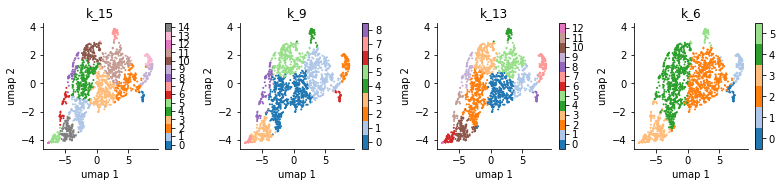

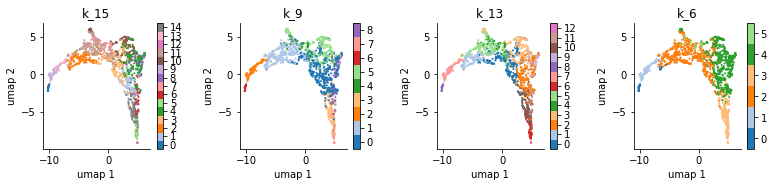

In [5]:
kids = clust_df.columns
plot_multiple_scatter_discrete(embedding, clust_df, palette = 'tab20')
plot_multiple_scatter_discrete(moor_embed, int_df[kids], palette = 'tab20')

In [6]:
def custom_multiple_scatter_discrete(embedding, clust_df, palette='tab10', fn=None, large=False):
    if large:
        figsize=(3.5,4.9)
        ms = 2
    else:
        figsize=(2.2,2.9)
        ms = 0.5
    fig, ax = plt.subplots(1, 1, figsize=figsize)       
    lut = get_sim_color_map(clust_df, palette=palette)
    plot_scatter_discrete(embedding, 
                          clust_df, cols=lut,
                          ax=ax, ms=ms,
                          orientation='horizontal')
    ax.tick_params(labelbottom=False, labelleft=False)  
    ax.set_xlabel(None)
    ax.set_ylabel(None)
    ax.axes.get_xaxis().set_visible(False)
    ax.axes.get_yaxis().set_visible(False)
    plt.tight_layout()
    if fn:
        plt.savefig(fn, bbox_inches='tight', transparent=True) 
        logger.info("Saved figure to: {}".format(fn))
    plt.show()
def plot_cluster_curves(ddf, col, dat, palette='tab10'):
    cids = np.unique(ddf[col])
    lut = get_sim_color_map(ddf[col], palette=palette)
    figsize = (2.9*len(cids)-0.2*(len(cids)-1),2.5)
    fig, axes = plt.subplots(1, len(cids), figsize=figsize)
    for i, cid in enumerate(cids):
        sel = ddf[col] == cid
        idx = ddf.loc[sel][dat['idx']]
        mat = dat['mtx'][:, idx]
        x = dat['x']
        ax = axes[i]
        plot_multi_curves(ax, x, mat, alpha=0.2, color=lut[cid])
        ax.set_title('cluster {}'.format(cid))
    plt.show()

[feat_viz INFO] Saved figure to: /scratch/PI/sabatti/spatial_subplots/embed_ours_id_k_15.pdf


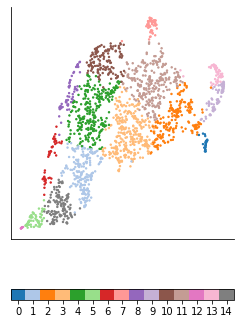

[feat_viz INFO] Saved figure to: /scratch/PI/sabatti/spatial_subplots/embed_moor_id_k_15.pdf


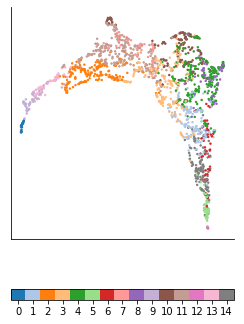

[feat_viz INFO] Saved figure to: /scratch/PI/sabatti/spatial_subplots/curve_fits_ours_k_15.pdf


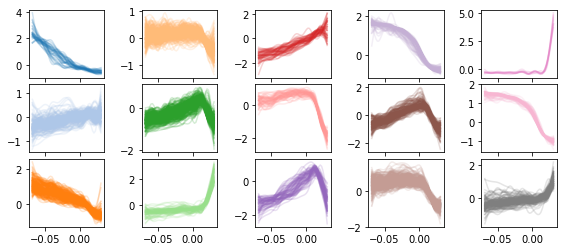

In [47]:
use_k = 'k_15'
fn = fdir + 'embed_ours_id_{}.pdf'.format(use_k)
custom_multiple_scatter_discrete(embedding, clust_df[use_k], palette = 'tab20', large=True, fn=fn)
fn = fdir + 'embed_moor_id_{}.pdf'.format(use_k)
custom_multiple_scatter_discrete(moor_embed, int_df[use_k], palette = 'tab20', large=True, fn=fn)
fn = fdir + 'curve_fits_ours_{}.pdf'.format(use_k)
custom_cluster_curves(int_df, use_k, cmp_dict['ours'], palette = 'tab20', fn=fn)

[feat_viz INFO] Saved figure to: /scratch/PI/sabatti/spatial_subplots/embed_ours_id_moor.pdf


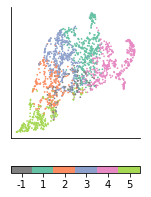

[feat_viz INFO] Saved figure to: /scratch/PI/sabatti/spatial_subplots/embed_moor_id_moor.pdf


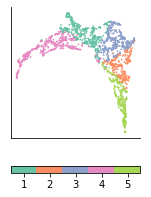

[feat_viz INFO] Saved figure to: /scratch/PI/sabatti/spatial_subplots/embed_ours_id_k_9.pdf


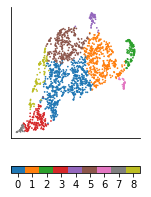

[feat_viz INFO] Saved figure to: /scratch/PI/sabatti/spatial_subplots/embed_moor_id_k_9.pdf


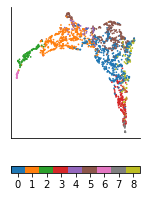

In [48]:
fn = fdir + 'embed_ours_id_moor.pdf'
custom_multiple_scatter_discrete(embedding, use_df['moor_clust'], palette = 'Set2', fn=fn)
fn = fdir + 'embed_moor_id_moor.pdf'
custom_multiple_scatter_discrete(moor_embed, int_df['moor_clust'], palette = 'Set2', fn=fn)
use_k = 'k_9'
fn = fdir + 'embed_ours_id_{}.pdf'.format(use_k)
custom_multiple_scatter_discrete(embedding, clust_df[use_k], palette = 'tab10', fn=fn)
fn = fdir + 'embed_moor_id_{}.pdf'.format(use_k)
custom_multiple_scatter_discrete(moor_embed, int_df[use_k], palette = 'tab10', fn=fn)

[feat_viz INFO] Saved figure to: /scratch/PI/sabatti/spatial_subplots/curve_fits_moor.pdf


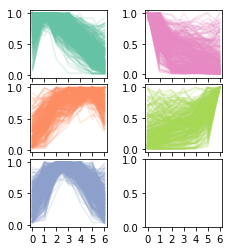

[feat_viz INFO] Saved figure to: /scratch/PI/sabatti/spatial_subplots/curve_fits_ours_k_9.pdf


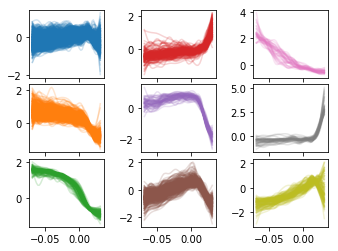

In [49]:
def custom_cluster_curves(ddf, col, dat, palette='tab10', zone=False, fn=None):
    cids = np.unique(ddf[col])
    lut = get_sim_color_map(ddf[col], palette=palette)
    n_rows = 3
    n_cols = int(np.ceil(len(cids) / n_rows))
    figsize = (1.6*n_cols, 1.2*n_rows)
    fig, axes = plt.subplots(n_rows, n_cols, figsize=figsize, sharex=True)
    for idx, cid in enumerate(cids):
        i = idx % n_rows
        j = idx // n_rows
        ax = axes[i, j]
        sel = ddf[col] == cid
        idx = ddf.loc[sel][dat['idx']]
        mat = dat['mtx'][:, idx]
        x = dat['x']
        plot_multi_curves(ax, x, mat, alpha=0.2, color=lut[cid])
        if zone:
            ax.set_xlim(-0.2, 6.2)
            ax.set_xticks(np.arange(7))
    plt.tight_layout()
    plt.subplots_adjust(hspace=0.1, wspace=0.5)
    if fn:
        plt.savefig(fn, bbox_inches='tight', transparent=True) 
        logger.info("Saved figure to: {}".format(fn))
    
    plt.show()
fn = fdir + 'curve_fits_moor.pdf'
custom_cluster_curves(int_df, 'moor_clust', cmp_dict['moor'], palette = 'Set2', zone=True, fn=fn)
fn = fdir + 'curve_fits_ours_{}.pdf'.format(use_k)
custom_cluster_curves(int_df, use_k, cmp_dict['ours'], palette = 'tab10', fn=fn)

# Exploration with exisiting utils

In [25]:
from collections import Counter
from io_utils import save_data_to_file

def save_clusters_to_dir(use_k):
    cdir = fdir + 'intestine_gene_clusters_ours_{}/'.format(use_k)
    os.makedirs(cdir, exist_ok=True)
    # save cluster genes to folder    
    cids = np.unique(clust_df[use_k])
    print(Counter(clust_df[use_k]))
    for cid in cids:
        gdf = use_df.loc[clust_df[use_k]==cid]
        glist = gdf['gene_ids']
        print('c{} : {}'.format(cid, len(glist)))
        fn = os.path.join(cdir, 'c_{}.csv'.format(cid))
        save_data_to_file(gdf, fn, 'csv')
        print('saved: {}'.format(fn))

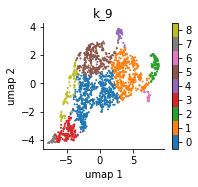

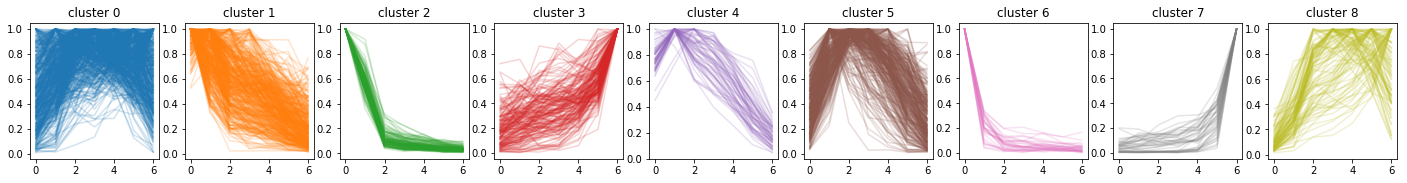

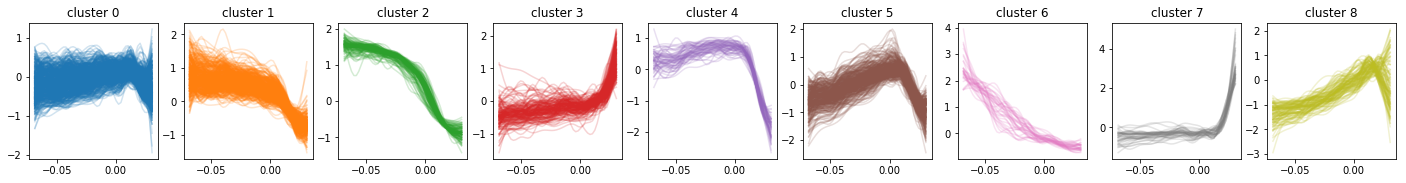

Counter({0: 646, 1: 427, 5: 311, 3: 177, 2: 121, 8: 104, 4: 60, 7: 41, 6: 33})
c0 : 646
saved: /scratch/PI/sabatti/spatial_subplots/intestine_gene_clusters_ours_k_9/c_0.csv
c1 : 427
saved: /scratch/PI/sabatti/spatial_subplots/intestine_gene_clusters_ours_k_9/c_1.csv
c2 : 121
saved: /scratch/PI/sabatti/spatial_subplots/intestine_gene_clusters_ours_k_9/c_2.csv
c3 : 177
saved: /scratch/PI/sabatti/spatial_subplots/intestine_gene_clusters_ours_k_9/c_3.csv
c4 : 60
saved: /scratch/PI/sabatti/spatial_subplots/intestine_gene_clusters_ours_k_9/c_4.csv
c5 : 311
saved: /scratch/PI/sabatti/spatial_subplots/intestine_gene_clusters_ours_k_9/c_5.csv
c6 : 33
saved: /scratch/PI/sabatti/spatial_subplots/intestine_gene_clusters_ours_k_9/c_6.csv
c7 : 41
saved: /scratch/PI/sabatti/spatial_subplots/intestine_gene_clusters_ours_k_9/c_7.csv
c8 : 104
saved: /scratch/PI/sabatti/spatial_subplots/intestine_gene_clusters_ours_k_9/c_8.csv


In [26]:
use_k = 'k_9'
plot_multiple_scatter_discrete(embedding, clust_df[[use_k]])
plot_cluster_curves(int_df, use_k, cmp_dict['moor'])
plot_cluster_curves(int_df, use_k, cmp_dict['ours'])
save_clusters_to_dir(use_k)

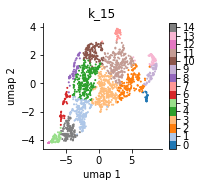

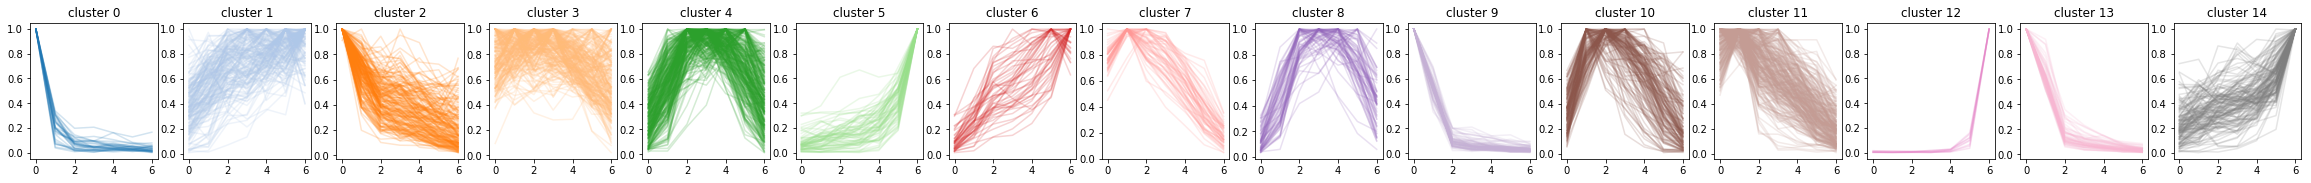

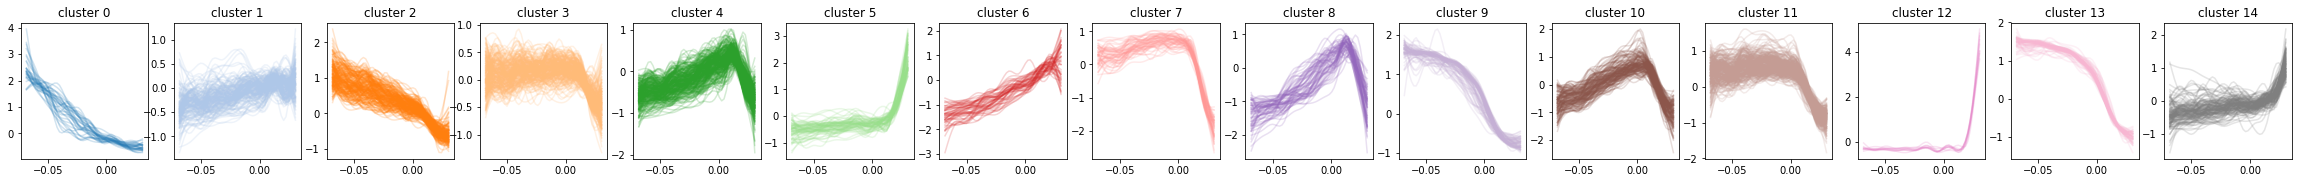

Counter({3: 299, 4: 274, 11: 267, 1: 202, 2: 193, 10: 139, 14: 137, 9: 73, 5: 70, 8: 66, 13: 56, 7: 55, 6: 49, 0: 31, 12: 9})
c0 : 31
saved: /scratch/PI/sabatti/spatial_subplots/intestine_gene_clusters_ours_k_15/c_0.csv
c1 : 202
saved: /scratch/PI/sabatti/spatial_subplots/intestine_gene_clusters_ours_k_15/c_1.csv
c2 : 193
saved: /scratch/PI/sabatti/spatial_subplots/intestine_gene_clusters_ours_k_15/c_2.csv
c3 : 299
saved: /scratch/PI/sabatti/spatial_subplots/intestine_gene_clusters_ours_k_15/c_3.csv
c4 : 274
saved: /scratch/PI/sabatti/spatial_subplots/intestine_gene_clusters_ours_k_15/c_4.csv
c5 : 70
saved: /scratch/PI/sabatti/spatial_subplots/intestine_gene_clusters_ours_k_15/c_5.csv
c6 : 49
saved: /scratch/PI/sabatti/spatial_subplots/intestine_gene_clusters_ours_k_15/c_6.csv
c7 : 55
saved: /scratch/PI/sabatti/spatial_subplots/intestine_gene_clusters_ours_k_15/c_7.csv
c8 : 66
saved: /scratch/PI/sabatti/spatial_subplots/intestine_gene_clusters_ours_k_15/c_8.csv
c9 : 73
saved: /scratch/

In [27]:
use_k = 'k_15'
plot_multiple_scatter_discrete(embedding, clust_df[[use_k]], palette = 'tab20')
plot_cluster_curves(int_df, use_k, cmp_dict['moor'], palette = 'tab20')
plot_cluster_curves(int_df, use_k, cmp_dict['ours'], palette = 'tab20')
save_clusters_to_dir(use_k)

In [ ]:
custom_multiple_scatter_discrete(moor_embed, int_df[use_k], palette = 'tab20')